# Stock Market Analysis Project

Analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. 

**Importing the various libraries we will need**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import datetime

C:\Users\nisha\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Part 1: Getting the Data


#### Tesla Stock (Ticker: TSLA on the NASDAQ)


**Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Apr 1, 2017.**

In [2]:
start = datetime.datetime(2012,1,1)

In [3]:
end = datetime.datetime(2017,1,1)

In [4]:
Tesla = web.DataReader('TSLA' , 'yahoo' , start = start , end = end)

In [5]:
Tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002


### Other Car Companies

**Repeat the same steps to grab data for Ford and GM (General Motors)**

In [6]:
Ford = web.DataReader('F' , 'yahoo' , start = start , end = end)

In [7]:
Ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192


In [8]:
GM = web.DataReader('GM' , 'yahoo' , start , end)

In [9]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


## Part 2: Visualizing the Data

### Time to visualize the data.

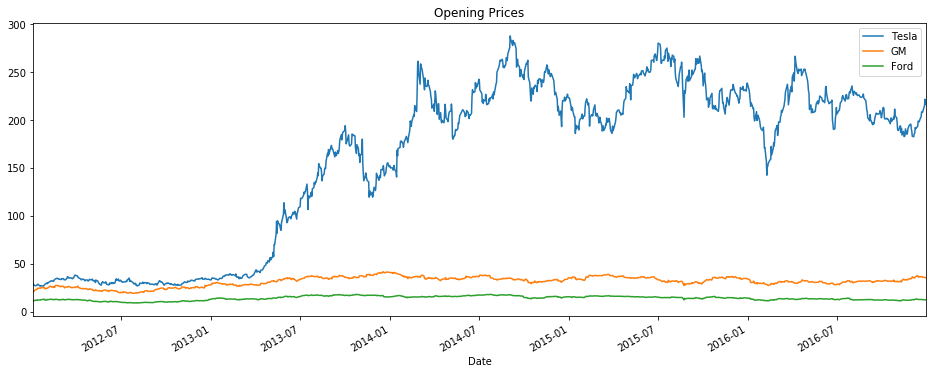

In [10]:
Tesla['Open'].plot(figsize = (16,6),title = 'Opening Prices')
GM['Open'].plot()
Ford['Open'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford']);

**Plot the Volume of stock traded each day.**

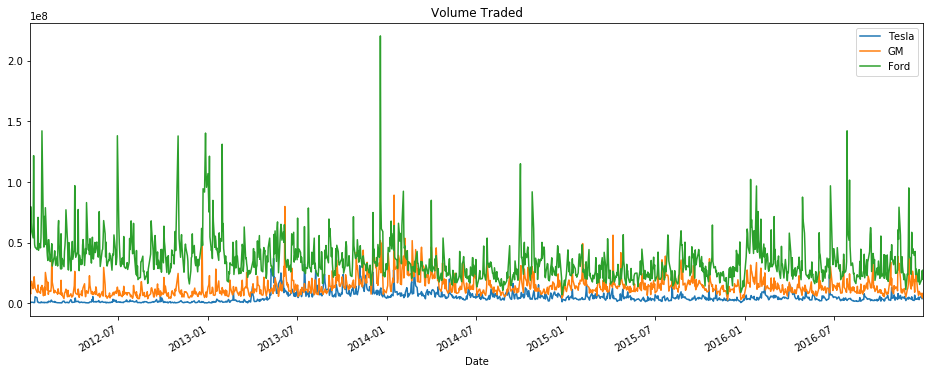

In [11]:
Tesla['Volume'].plot(figsize = (16,6) , title = 'Volume Traded')
GM['Volume'].plot()
Ford['Volume'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford']);

**Looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**What happened that day?**

In [12]:
Ford[Ford['Volume'] == Ford['Volume'].max()].index[0]  # Ford['Volume'].argmax()

# News :- Ford shares fell sharply Wednesday after the company warned the cost of its aggressive push to launch new products 
# would cut into profits next year.

Timestamp('2013-12-18 00:00:00')

**The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multiply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series.**

**Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [13]:
Tesla['Total Traded'] = Tesla['Open']*Tesla['Volume']
Ford['Total Traded'] = Ford['Open']*Ford['Volume']
GM['Total Traded'] = GM['Open']*GM['Volume']

**Plot this "Total Traded" against the time index.**

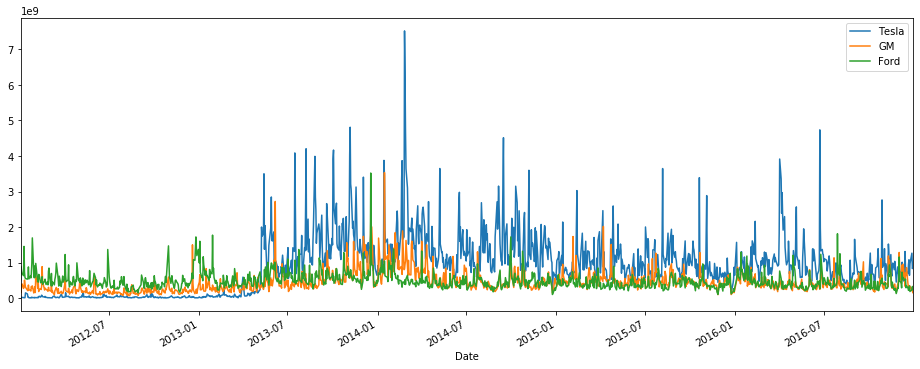

In [14]:
Tesla['Total Traded'].plot(figsize = (16,6))
GM['Total Traded'].plot()
Ford['Total Traded'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford']);

**Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened?**

In [15]:
Tesla[Tesla['Total Traded'] == Tesla['Total Traded'].max()].index[0] # Tesla['Total Traded].argmax()

# The fourth-quarter results reignited Tesla's momentum in the stock market,Investors are betting that 
# Tesla will transform the global auto industry as it grows from a niche player to a full-scale automaker 
# to rival Ford (F), Toyota (TM) and General Motors (GM).

Timestamp('2014-02-25 00:00:00')

**Plotting out MA (Moving Averages) MA50 and MA200 for GM.**

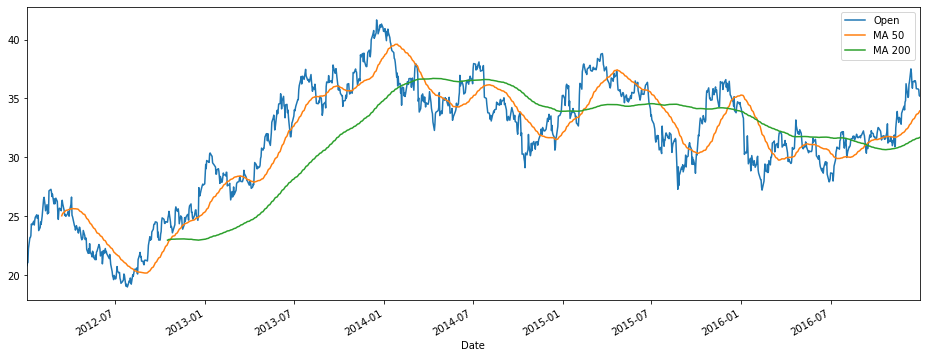

In [16]:
GM['MA 50'] = GM['Open'].rolling(50).mean()
GM['MA 200'] = GM['Open'].rolling(200).mean()
GM[['Open' , 'MA 50' , 'MA 200']].plot(figsize = (16,6));

**Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot**

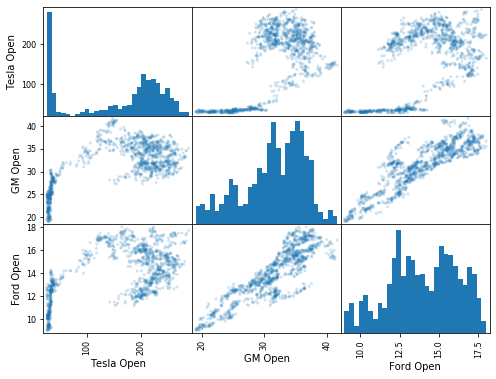

In [17]:
from pandas.plotting import scatter_matrix
Open_DataFrame = pd.DataFrame({ 'Tesla Open': Tesla['Open'], 'GM Open': GM['Open'] , 'Ford Open': Ford['Open']})
scatter_matrix(Open_DataFrame , diagonal = 'hist' , alpha = 0.2 , figsize = (8,6) , hist_kwds = {'bins' : 30});

### Bonus Visualization Task!

**Create a candlestick chart Ford in January 2012! Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

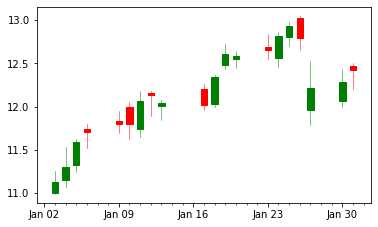

In [35]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
Ford_reset = Ford.loc['2012-01':'2012-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
Ford_reset['date_ax'] = Ford_reset['Date'].apply(lambda date: date2num(date))
Ford_values = [tuple(vals) for vals in Ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, Ford_values, width=0.6, colorup='g',colordown='r');

# Part 3: Basic Financial Analysis

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

**Create a new column for each dataframe called returns. Either use a simple calculation using the .shift() method use pandas' built in pct_change method.**

In [19]:
Tesla['Returns'] = Tesla['Close'].pct_change(1)
#Tesla['Returns'] = (Tesla['Close'] / Tesla['Close'].shift(1)) - 1 

In [20]:
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [21]:
Ford['Returns'] = Ford['Close'].pct_change(1) 
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192,6.386011e+08,0.007686


In [22]:
GM['Returns'] = GM['Close'].pct_change(1)
GM.drop(['MA 200' , 'MA 50'] ,  axis = 1).head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,-0.003490


**Now plot a histogram of each companies returns.Which stock is the most "volatile"? (as judged by the variance in the daily returns)**

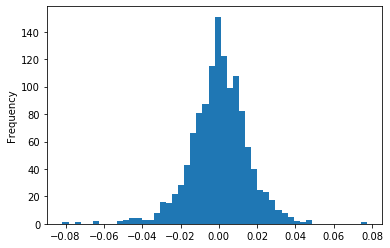

In [23]:
Ford['Returns'].plot.hist(bins = 50);

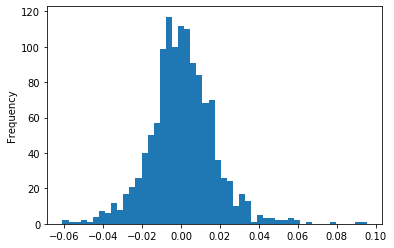

In [24]:
GM['Returns'].plot.hist(bins = 50);

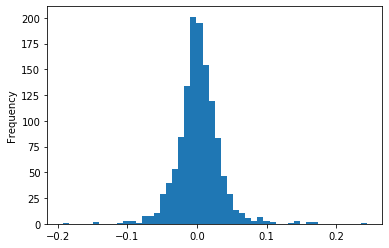

In [25]:
Tesla['Returns'].plot.hist(bins = 50);

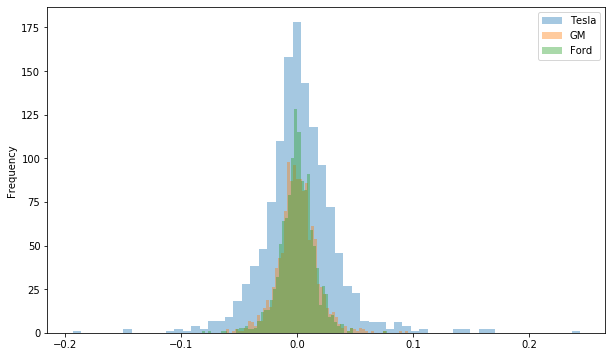

In [26]:
Tesla['Returns'].plot.hist(figsize = (10,6) , bins = 60 , alpha = 0.4)
GM['Returns'].plot.hist(bins = 60 , alpha = 0.4)
Ford['Returns'].plot.hist(bins = 60 , alpha = 0.4)
plt.legend(['Tesla' , 'GM' , 'Ford']);

# Tesla is the most volatile stock in comparison with GM and Ford.

**Plotting a KDE instead of histograms for another view point. Which stock has the widest plot?**

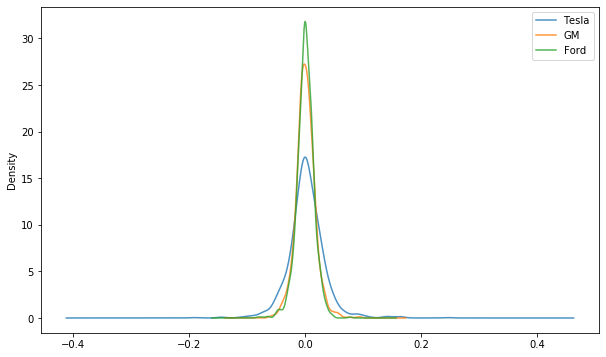

In [27]:
Tesla['Returns'].plot.kde(figsize = (10,6) , label = 'Tesla' , alpha = 0.8)
GM['Returns'].plot.kde(label = 'GM' , alpha = 0.8)
Ford['Returns'].plot.kde(label = 'Ford' , alpha = 0.8)
plt.legend();

**Creating some box plots comparing the returns.**

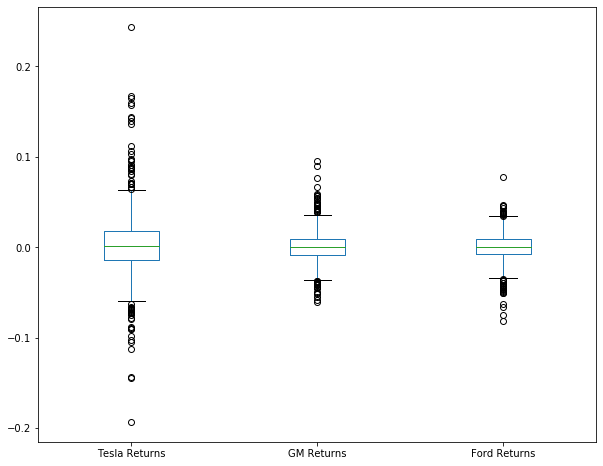

In [28]:
Returns_Df = pd.DataFrame({'Tesla Returns': Tesla['Returns'], 
                           'GM Returns': GM['Returns'] , 
                           'Ford Returns': Ford['Returns']})

#Another way of creating the dataframe

#Returns_Df = pd.concat([Tesla['Returns'] , GM['Returns'] , Ford['Returns']] , axis = 1)
#Returns_Df.columns = ['Tesla Returns' , 'GM Returns' , 'Ford Returns']
#Returns_Df

Returns_Df.plot.box(figsize = (10,8));

## Comparing Daily Returns between Stocks

**Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

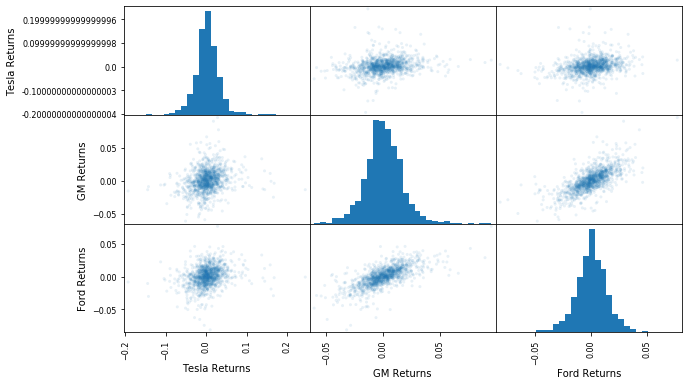

In [29]:
scatter_matrix(Returns_Df , diagonal = 'hist' , alpha = 0.1 , figsize = (10,6) , hist_kwds = {'bins' : 30});

**It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

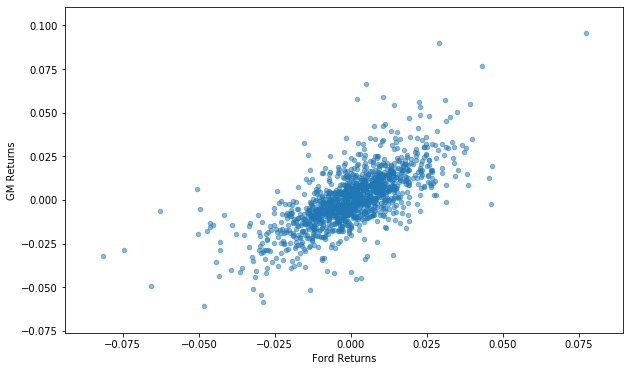

In [30]:
Returns_Df.plot.scatter(x = 'Ford Returns' , y= 'GM Returns' , figsize = (10,6) , alpha = 0.5);

## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (one should have realized it was Tesla).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

**Create a cumulative daily return column for each car company's dataframe.**

In [31]:
Tesla['cumulative_return'] = ( 1 + Tesla['Returns'] ).cumprod()
GM['cumulative_return'] = ( 1 + GM['Returns'] ).cumprod()
Ford['cumulative_return'] = ( 1 + Ford['Returns'] ).cumprod()
Tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,cumulative_return
Date,,,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,9.714640e+08,0.023459,7.597578
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,1.271166e+09,0.029015,7.818020
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,8.379372e+08,0.000957,7.825499
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993,8.840752e+08,-0.023027,7.645299
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,1.004194e+09,-0.004611,7.610043


**Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a 1 dollar invested? Which showed the lowest?**

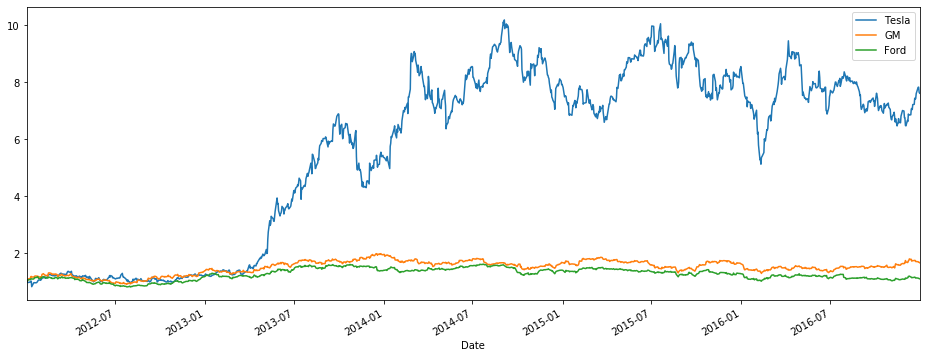

In [32]:
Tesla['cumulative_return'].plot(figsize = (16,6))
GM['cumulative_return'].plot()
Ford['cumulative_return'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford'])